In [ ]:
import cv2
import numpy as np

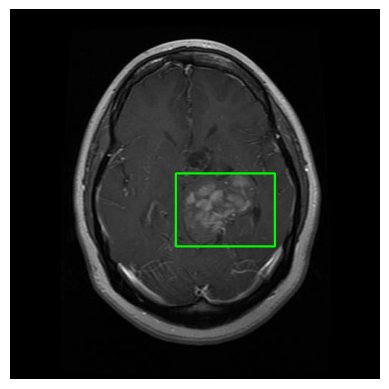

Offset (x, y): 229 227


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the larger image and the template image
large_image = cv2.imread('/large_image.jpg')
template_image = cv2.imread('/template_image.jpg')

# Find the dimensions of the template image
template_height, template_width, _ = template_image.shape

# Use template matching to find the template in the larger image
result = cv2.matchTemplate(large_image, template_image, cv2.TM_CCOEFF_NORMED)

# Get the location (x, y) of the best match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Calculate the offset
offset_x, offset_y = max_loc

# Draw a rectangle around the found template
cv2.rectangle(large_image, (offset_x, offset_y), (offset_x + template_width, offset_y + template_height), (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(large_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: Hide axis labels and ticks
plt.show()
# Print the offset
print("Offset (x, y):", offset_x, offset_y)


In [ ]:
!pip install image-registration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 31.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for image-registration: filename=image_registration-0.2.6-py3-none-any.whl size=65228 sha256=920f7bd38788f9ac3d6175baf713f843f8ecf16939641afea97f05a59c13dea3
  Stored in directory: /root/.cache/pip/wheels/3f/79/4c/7b1e6a08a9b81bde2326b52313796f57bc483b48697231345a
Successfully built image-registration


In [ ]:
!pip install image-registration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for image-registration: filename=image_registration-0.2.6-py3-none-any.whl size=65228 sha256=9438dc9b359e984e7e0ade00661f2d5f2c71b7cb2b05d6b791d0cd3820916ea1
  Stored in directory: /root/.cache/pip/wheels/3f/79/4c/7b1e6a08a9b81bde2326b52313796f57bc483b48697231345a
Successfully built image-registration


Shift in x-axis: -101
Shift in y-axis: -51


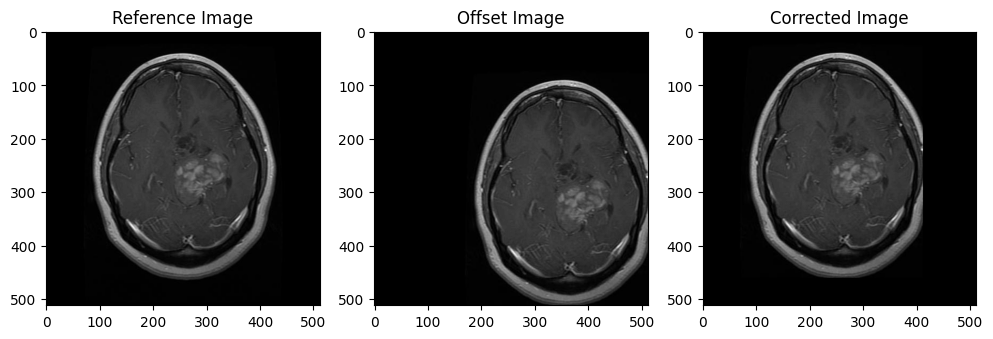

In [ ]:
import numpy as np
from skimage import io, color
from scipy.signal import correlate2d
import matplotlib.pyplot as plt

# Load the images and convert to grayscale
image = color.rgb2gray(io.imread("original_image.jpg"))
offset_image = color.rgb2gray(io.imread("translated_image.jpg"))

# Set the noise level (you may need to adjust this value)
noise = 0.1

# Find the shift using cross-correlation
correlation = correlate2d(image, offset_image, mode='same')
yoff, xoff = np.unravel_index(np.argmax(correlation), correlation.shape) - np.array(image.shape) // 2

print("Shift in x-axis:", xoff)
print("Shift in y-axis:", yoff)

# Apply the shift to the offset image
corrected_image = np.roll(offset_image, (yoff, xoff), axis=(0, 1))

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Reference Image')
axes[1].imshow(offset_image, cmap='gray')
axes[1].set_title('Offset Image')
axes[2].imshow(corrected_image, cmap='gray')
axes[2].set_title('Corrected Image')
plt.show()


In [ ]:
pip show image_registration

Name: image-registration
Version: 0.2.6
Summary: Package for registering images with extended emission
Home-page: https://image-registration.readthedocs.io/en/latest/
Author: Adam Ginsburg
Author-email: adam.g.ginsburg@gmail.com
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: astropy
Required-by: 


In [ ]:
pip install --upgrade image_registration

Optimal Shift in X-axis: -10
Optimal Shift in Y-axis: -10
Optimal Chi-squared Statistic: 39951.65760709922


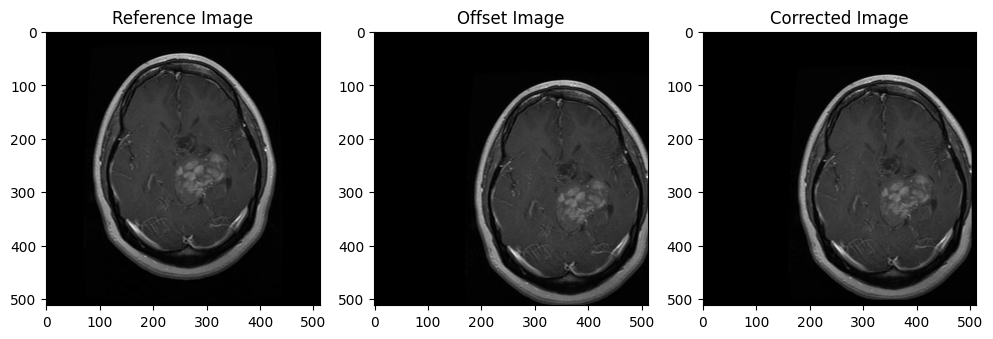

In [ ]:
import numpy as np
from skimage import io, color
from scipy.ndimage import shift
from scipy.signal import correlate2d
import matplotlib.pyplot as plt

# Load the images
image = color.rgb2gray(io.imread("original_image.jpg"))
offset_image = color.rgb2gray(io.imread("translated_image.jpg"))

# Set the noise level (you may need to adjust this value)
noise = 0.1

# Function to calculate the chi-squared statistic
def chi2_statistic(image, offset_image):
    diff = image - offset_image
    chi2 = np.sum(diff**2 / (image + noise))
    return chi2

# Calculate the chi-squared statistic for different shifts
shift_range = 10  # Adjust the range as needed
best_chi2 = float('inf')
best_xoff, best_yoff = 0, 0

for xoff in range(-shift_range, shift_range + 1):
    for yoff in range(-shift_range, shift_range + 1):
        shifted_offset_image = shift(offset_image, shift=(yoff, xoff), mode='constant')
        chi2 = chi2_statistic(image, shifted_offset_image)

        if chi2 < best_chi2:
            best_chi2 = chi2
            best_xoff, best_yoff = xoff, yoff

# Apply the optimal shift to the offset image
corrected_image = shift(offset_image, shift=(best_yoff, best_xoff), mode='constant')

# Display the images and results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Reference Image')

axes[1].imshow(offset_image, cmap='gray')
axes[1].set_title('Offset Image')

axes[2].imshow(corrected_image, cmap='gray')
axes[2].set_title('Corrected Image')

print("Optimal Shift in X-axis:", best_xoff)
print("Optimal Shift in Y-axis:", best_yoff)
print("Optimal Chi-squared Statistic:", best_chi2)

plt.show()


Shift in X-axis: 8.420584
Shift in Y-axis: -0.29750037


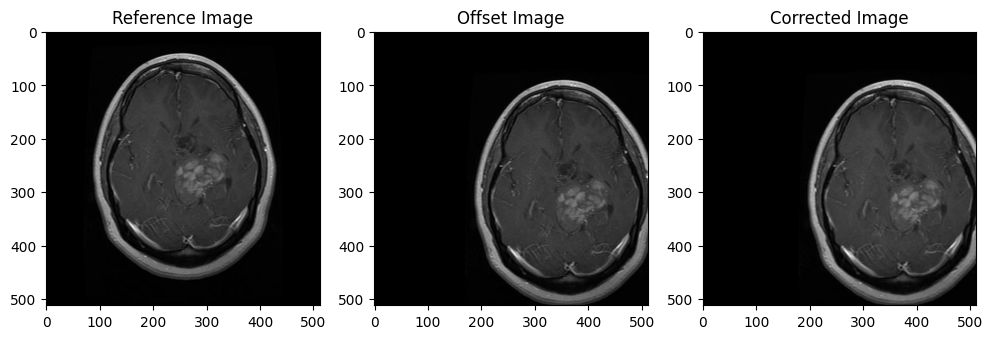

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the reference and offset images
image1 = cv2.imread("original_image.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("translated_image.jpg", cv2.IMREAD_GRAYSCALE)

# Optical Flow Parameters
lk_params = dict(
    winSize=(15, 15),
    maxLevel=2,
    criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03),
)

# Define feature points in the reference image
p0 = cv2.goodFeaturesToTrack(image1, maxCorners=200, qualityLevel=0.01, minDistance=10)

# Calculate optical flow
p1, st, err = cv2.calcOpticalFlowPyrLK(image1, image2, p0, None, **lk_params)

# Filter out points with a bad status
good_new = p1[st == 1]
good_old = p0[st == 1]

# Calculate the shift between the two images
xoff = np.mean(good_new[:, 0] - good_old[:, 0])
yoff = np.mean(good_new[:, 1] - good_old[:, 1])

# Apply the shift to the offset image
h, w = image2.shape
M = np.float32([[1, 0, xoff], [0, 1, yoff]])
corrected_image = cv2.warpAffine(image2, M, (w, h))

# Display the images and results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Reference Image')
axes[1].imshow(image2, cmap='gray')
axes[1].set_title('Offset Image')
axes[2].imshow(corrected_image, cmap='gray')
axes[2].set_title('Corrected Image')

print("Shift in X-axis:", xoff)
print("Shift in Y-axis:", yoff)

plt.show()


In [ ]:
import multiprocessing
import numpy as np
from skimage import io, color, registration
from scipy.ndimage import shift

# Define a function for image registration using the chi-squared statistic
def register_image_chi2(image, offset_image, noise):
    # Perform chi-squared registration using skimage's registration module
    result = registration.phase_cross_correlation(image, offset_image)
    xoff, yoff = result[0]
    return xoff, yoff

# Load a list of image paths (e.g., your dataset of medical images)
image_paths = ["translated_image.jpg"]

# Preprocess the reference image (if needed)
reference_image = color.rgb2gray(io.imread("original_image.jpg"))

# Set the noise level
noise = 0.1

# Create a pool of worker processes
pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())

# Use the pool to parallelize image registration
results = []
for path in image_paths:
    offset_image = color.rgb2gray(io.imread(path))
    result = pool.apply_async(register_image_chi2, args=(reference_image, offset_image, noise))
    results.append(result)

# Close the pool and wait for all processes to complete
pool.close()
pool.join()

# Retrieve the results
shift_results = [result.get() for result in results]

# Process the results as needed (e.g., visualize or analyze shifts)
for i, (xoff, yoff) in enumerate(shift_results):
    print(f"Image {i + 1} - Shift in X-axis: {xoff}, Shift in Y-axis: {yoff}")

# Continue with tumor detection or other analysis


Image 1 - Shift in X-axis: -50.0, Shift in Y-axis: -100.0
